In [1]:
import os
import json
from PIL import Image
import numpy as np

def create_rec_images(root_path, output_path, annotation_file):

    os.makedirs(output_path, exist_ok=True)

    with open(annotation_file, 'r') as file:
        for line in file:
            img_path, json_str = line.strip().split("\t", 1)

            img_path = os.path.join(root_path, img_path)
            image = Image.open(img_path)

            label_data = json.loads(json_str)
            index = 1
            for item in label_data:
                points = np.array(item["points"])

                cropped_img = image.crop((min(points[:, 0]), min(points[:, 1]), max(points[:, 0]), max(points[:, 1])))
                image_name = os.path.basename(img_path)[:-4] + "_" + str(index) + ".jpg"
                output_file = os.path.join(output_path, image_name)
                cropped_img.save(output_file)
                index += 1

def create_rec_annotation(annotation_dir, out_label):
    with open(out_label, 'w', encoding='utf-8') as out_file:
        with open(annotation_dir, 'r', encoding='utf-8-sig') as annot_file:
            for line in annot_file.readlines():
                img_path, json_str = line.strip().split("\t", 1)
                label_data = json.loads(json_str)

                index = 1
                for item in label_data:
                    transcription = item["transcription"]

                    # Generate new image filename
                    new_img_filename = img_path[:-4] + "_" + str(index) + ".jpg"

                    # Write to the output annotation file
                    out_file.write(new_img_filename + '\t' + transcription + '\n')

                    index += 1

In [3]:
root_path_det = '/home/mlteam/work/bazo/mn_ocr/dataset/detection/'
# Create train images
output_path_train_imgs = '/home/mlteam/work/bazo/mn_ocr/dataset/recognition/imgs'
annotation_file_train = '/home/mlteam/work/bazo/mn_ocr/dataset/detection/annotation_train.txt'
create_rec_images(root_path_det, output_path_train_imgs, annotation_file_train)

#Create train annotation
annotation_file_train_rec = '/home/mlteam/work/bazo/mn_ocr/dataset/recognition/annotation_train.txt'
create_rec_annotation(annotation_file_train, annotation_file_train_rec)
print("train annotation for rec is created")


train annotation for rec is created


In [4]:
import random
import os

source_file = "/home/mlteam/work/bazo/mn_ocr/dataset/recognition/annotation.txt"

train_file = "/home/mlteam/work/bazo/mn_ocr/dataset/recognition/annotation_train.txt"
test_file = "/home/mlteam/work/bazo/mn_ocr/dataset/recognition/annotation_test.txt"

with open(source_file, 'r') as f:
    lines = f.readlines()

random.shuffle(lines)
train_data = lines[:80000]

with open(train_file, 'w') as f:
    f.writelines(train_data)

test_data = lines[80000:]
with open(test_file, 'w') as f:
    f.writelines(test_data)

print(f"Training data saved to {train_file}")
print(f"Test data saved to {test_file}")

Training data saved to /home/mlteam/work/bazo/mn_ocr/dataset/recognition/annotation_train.txt
Test data saved to /home/mlteam/work/bazo/mn_ocr/dataset/recognition/annotation_test.txt


In [2]:
# Train detection model
!python3 /home/mlteam/work/bazo/base_models_prep/PaddleOCR/tools/train.py -c /home/mlteam/work/bazo/mn_ocr/config/v3_det.yml

[2024/09/16 06:45:51] ppocr INFO: Architecture : 
[2024/09/16 06:45:51] ppocr INFO:     Models : 
[2024/09/16 06:45:51] ppocr INFO:         Student : 
[2024/09/16 06:45:51] ppocr INFO:             Backbone : 
[2024/09/16 06:45:51] ppocr INFO:                 disable_se : True
[2024/09/16 06:45:51] ppocr INFO:                 model_name : large
[2024/09/16 06:45:51] ppocr INFO:                 name : MobileNetV3
[2024/09/16 06:45:51] ppocr INFO:                 scale : 0.5
[2024/09/16 06:45:51] ppocr INFO:             Head : 
[2024/09/16 06:45:51] ppocr INFO:                 k : 50
[2024/09/16 06:45:51] ppocr INFO:                 name : DBHead
[2024/09/16 06:45:51] ppocr INFO:             Neck : 
[2024/09/16 06:45:51] ppocr INFO:                 name : RSEFPN
[2024/09/16 06:45:51] ppocr INFO:                 out_channels : 96
[2024/09/16 06:45:51] ppocr INFO:                 shortcut : True
[2024/09/16 06:45:51] ppocr INFO:             Transform : None
[2024/09/16 06:45:51] ppocr INFO:

In [5]:
# Train detection model
!python3 /home/mlteam/work/bazo/base_models_prep/PaddleOCR/tools/train.py -c /home/mlteam/work/bazo/mn_ocr/config/v3_rec.yml

[2024/09/18 04:16:16] ppocr INFO: Architecture : 
[2024/09/18 04:16:16] ppocr INFO:     Backbone : 
[2024/09/18 04:16:16] ppocr INFO:         last_conv_stride : [1, 2]
[2024/09/18 04:16:16] ppocr INFO:         last_pool_type : avg
[2024/09/18 04:16:16] ppocr INFO:         name : MobileNetV1Enhance
[2024/09/18 04:16:16] ppocr INFO:         scale : 0.5
[2024/09/18 04:16:16] ppocr INFO:     Head : 
[2024/09/18 04:16:16] ppocr INFO:         head_list : 
[2024/09/18 04:16:16] ppocr INFO:             CTCHead : 
[2024/09/18 04:16:16] ppocr INFO:                 Head : 
[2024/09/18 04:16:16] ppocr INFO:                     fc_decay : 1e-05
[2024/09/18 04:16:16] ppocr INFO:                 Neck : 
[2024/09/18 04:16:16] ppocr INFO:                     depth : 2
[2024/09/18 04:16:16] ppocr INFO:                     dims : 64
[2024/09/18 04:16:16] ppocr INFO:                     hidden_dims : 120
[2024/09/18 04:16:16] ppocr INFO:                     name : svtr
[2024/09/18 04:16:16] ppocr INFO:   

In [1]:
# Export detection model into inference model
!python3 /home/mlteam/work/bazo/base_models_prep/PaddleOCR/tools/export_model.py -c /home/mlteam/work/bazo/mn_ocr/config/v3_rec.yml -o Global.pretrained_model=/home/mlteam/work/bazo/mn_ocr/output/recognition/best_accuracy  Global.save_inference_dir=/home/mlteam/work/bazo/mn_ocr/output/recognition/trained_inference


W0919 00:30:05.891463 352764 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.2, Runtime API Version: 11.8
W0919 00:30:05.899544 352764 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.
[2024/09/19 00:30:06] ppocr INFO: load pretrain successful from /home/mlteam/work/bazo/mn_ocr/output/recognition/best_accuracy
I0919 00:30:06.855331 352764 interpretercore.cc:237] New Executor is Running.
[2024/09/19 00:30:07] ppocr INFO: inference model is saved to /home/mlteam/work/bazo/mn_ocr/output/recognition/trained_inference/inference
[2024/09/19 00:30:07] ppocr INFO: Export inference config file to /home/mlteam/work/bazo/mn_ocr/output/recognition/trained_inference/inference.yml


In [4]:
!python3 /home/bat/Documents/mn_ocr/mn_ocr_paddle/PaddleOCR/tools/infer/predict_rec.py\
     --rec_algorithm="SVTR_LCNet" \
        --rec_model_dir="/home/bat/Documents/mn_ocr/mn_ocr_paddle/trained_inference/"\
             --image_dir="/home/bat/Documents/mn_ocr/dataset/rec_sample/img_001_1.jpg"\
                 --use_gpu=False\
                     --rec_char_dict_path='/home/bat/Documents/mn_ocr/mn_ocr_paddle/mn_dict.txt'


Namespace(use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='/home/bat/Documents/mn_ocr/dataset/rec_sample/img_001_1.jpg', page_num=0, det_algorithm='DB', det_model_dir=None, det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/bat/Documents/mn_ocr/mn_ocr_paddle/trained_inference/', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/home/bat/Documents/m

In [5]:
from PaddleOCR.tools.infer.predict_rec import predict_custom

result = predict_custom("/home/bat/Documents/mn_ocr/dataset/rec_sample/img_001_1.jpg", "/home/bat/Documents/mn_ocr/mn_ocr_paddle/trained_inference/", False)
result


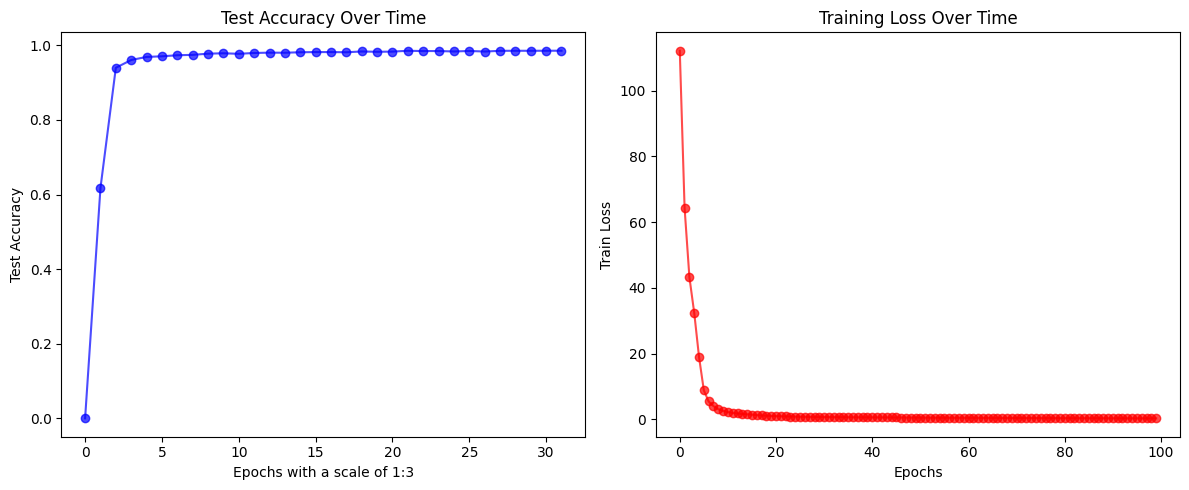

In [14]:
import re
import matplotlib.pyplot as plt

# Define file path
file_path = '/home/bat/Documents/mn_ocr_uchprak/mn_ocr_paddle/train.log'

# Initialize lists for accuracy and loss
accuracy_list = [0]
loss_list = []

# Read the file and extract data
with open(file_path, 'r') as file:
    for line in file:
        # Search for the accuracy pattern and extract the following float number
        acc_match = re.search(r"cur metric, acc:\s*([\d\.]+)", line)
        if acc_match:
            accuracy_list.append(float(acc_match.group(1)))
        
        # Search for the loss pattern and extract the following float number
        loss_match = re.search(r", loss:\s*([\d\.]+)", line)
        if loss_match:
            loss_list.append(float(loss_match.group(1)))

# Plot line charts
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Line plot for accuracy
axs[0].plot(accuracy_list, color='blue', marker='o', linestyle='-', alpha=0.7)
axs[0].set_title('Test Accuracy Over Time')
axs[0].set_xlabel('Epochs with a scale of 1:3')
axs[0].set_ylabel('Test Accuracy')

# Line plot for loss
axs[1].plot(loss_list, color='red', marker='o', linestyle='-', alpha=0.7)
axs[1].set_title('Training Loss Over Time')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Train Loss')

plt.tight_layout()
plt.show()


In [2]:
accuracy_list

[0.6177067473214047,
 0.939793674158808,
 0.9606798571277864,
 0.9688821233139844,
 0.9705733122183551,
 0.9733637739105667,
 0.9744630466984078,
 0.9775917461714936,
 0.9786910189593345,
 0.9772535083906194,
 0.9794520539663013,
 0.9803822078637052,
 0.9801285295280496,
 0.9813969212063277,
 0.9819042778776389,
 0.9819042778776389,
 0.9813969212063277,
 0.983510907336791,
 0.9826653128846057,
 0.983172669555917,
 0.9853712151315989,
 0.9846101801246321,
 0.9846947395698505,
 0.983510907336791,
 0.9848638584602877,
 0.983341788446354,
 0.9852866556863803,
 0.9853712151315989,
 0.9853712151315989,
 0.9854557745768174,
 0.9855403340220359]